Volem que implementeu un model o algoritme que permeti classificar del dataset A2 si aquella imatge hi ha error o no. Ens agradaria que mostressiu alguna gràfica de l'entrenament del model (en cas de fer ML) o mètriques qualitatives ( accuracy, recall, f1...) i quantitatives (matrius de confusió, ROC curve...).

In [131]:
#import libraries
import cv2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from os.path import exists

In [132]:
def list_all_images_to_csv(dataset):
    imgs_per_combi = 100
    data = {"paths":[],"c":[],"r":[],"e":[],"n":[]}
    for c in range(1,3): #iterar totes les c
        for r in range(1,3): #iterar totes les r
            for e in range(0,4): #iterar totes les e
                for idx in range(imgs_per_combi): #quantes imatges per carpeta intentar
                    if(exists(f"DATASET/{dataset}/c{c}/r{r}/images/e{e}/c{c}r{r}e{e}n{idx}.tif")):
                        
                        data["paths"].append(f"DATASET/{dataset}/c{c}/r{r}/images/e{e}/c{c}r{r}e{e}n{idx}.tif")
                        data["c"].append(c)
                        data["r"].append(r)
                        data["e"].append(e)
                        data["n"].append(idx)
    
                        
    df = pd.DataFrame(data)
    df.to_csv("A2.csv")


list_all_images_to_csv("A2/A2")

In [133]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn import svm
from sklearn.model_selection import train_test_split

In [134]:
df = pd.read_csv("A2.csv")
df.head(10)

,Unnamed: 0,paths,c,r,e,n
0,0,DATASET/A2/A2/c1/r1/images/e0/c1r1e0n1.tif,1,1,0,1
1,1,DATASET/A2/A2/c1/r1/images/e0/c1r1e0n2.tif,1,1,0,2
2,2,DATASET/A2/A2/c1/r1/images/e0/c1r1e0n3.tif,1,1,0,3
3,3,DATASET/A2/A2/c1/r1/images/e0/c1r1e0n4.tif,1,1,0,4
4,4,DATASET/A2/A2/c1/r1/images/e0/c1r1e0n5.tif,1,1,0,5
5,5,DATASET/A2/A2/c1/r1/images/e0/c1r1e0n6.tif,1,1,0,6
6,6,DATASET/A2/A2/c1/r1/images/e0/c1r1e0n7.tif,1,1,0,7
7,7,DATASET/A2/A2/c1/r1/images/e0/c1r1e0n8.tif,1,1,0,8
8,8,DATASET/A2/A2/c1/r1/images/e0/c1r1e0n9.tif,1,1,0,9
9,9,DATASET/A2/A2/c1/r1/images/e0/c1r1e0n10.tif,1,1,0,10


In [216]:
X = [] #list where to append vectors, so sample of each image
y = []

for index in range(len(df)):
    if df.iloc[index, 2]==1 and  df.iloc[index, 3]==1:
        im_path=df.iloc[index,1]
        image = cv2.cvtColor(cv2.imread(im_path), cv2.COLOR_BGR2GRAY) #load image, crop -> window_size -> convert to grayscale 1ch
        #(thresh, binary) = cv2.threshold(image, 110, 255, cv2.THRESH_BINARY)
        X.append(list(np.asarray(image).reshape(-1)))
        y.append(df.iloc[index,4])

#convert list of lists -> np matrix
X = np.matrix(X)

In [224]:
X = np.asarray(X)

In [225]:
y = np.asarray(y)

In [226]:
y[y>1]=1
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [227]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [228]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [229]:
clf.score(X_test, y_test)

0.9545454545454546

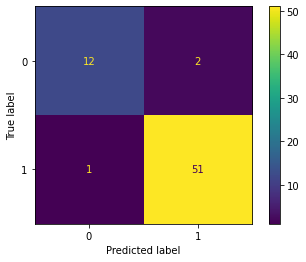

In [230]:
cm = confusion_matrix(y_test, clf.predict(X_test), labels=clf.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()